In [1]:
import matplotlib.pyplot as plt 
from ultra.visuals import make_matplotlib_pretty_again 
import ultra.visuals as v 
import numpy as np 
import math as m 
import vice 
import sys 
import os 

/anaconda3/lib/python3.7/site-packages/vice/__init__.py:99: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
def setup_axes(): 
    fig = plt.figure(figsize = (21, 7)) 
    ax1 = fig.add_subplot(131, facecolor = "white") 
    ax2 = fig.add_subplot(132, facecolor = "white") 
    ax3 = fig.add_subplot(133, facecolor = "white") 
    ax1.set_xlabel("Time [Gyr]") 
    ax1.set_ylabel(r"$\dot{M}$") 
    ax2.set_xlabel("[Fe/H]") 
    ax2.set_ylabel("[O/Fe]") 
    ax3.set_xlabel("[O/Fe]") 
    ax3.set_ylabel("Probability Density") 
    ax3.set_yscale("log") 
    return [ax1, ax2, ax3] 

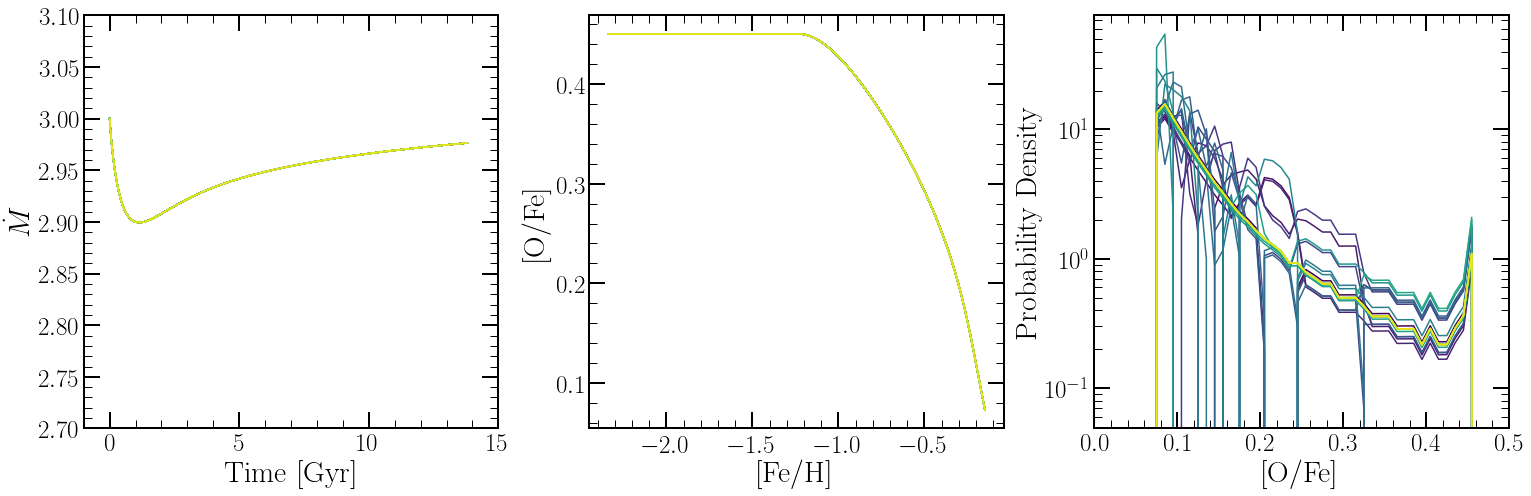

In [16]:
out = vice.output("../diskmodel") 
ax1, ax2, ax3 = setup_axes() 
cmap = plt.get_cmap("viridis") 
for i in range(len(out.keys())): 
    name = "zone%d" % (i) 
    color = cmap(float(i / len(out.keys()))) 
    ax1.plot(out[name].history["time"], out[name].history["sfr"], c = color) 
    ax1.plot(out[name].history["time"], out[name].history["ifr"], c = color, linestyle = ':')  
    ax2.plot(out[name].history["[Fe/H]"], out[name].history["[O/Fe]"], c = color) 
    bin_centers = list(map(lambda x, y: (x + y) / 2., 
        out[name].mdf["bin_edge_left"], 
        out[name].mdf["bin_edge_right"])) 
    ax3.plot(bin_centers, out[name].mdf["dN/d[O/Fe]"], c = color) 
ax1.set_xlim([-1, 15]) 
ax1.set_ylim([2.7, 3.1]) 
# ax2.set_xlim([-1.7, 1.1]) 
# ax2.set_ylim([-0.3, 0.5]) 
ax3.set_xlim([0.0, 0.5]) 
plt.tight_layout() 
plt.savefig("diskmodel_o.pdf") 
plt.show() 

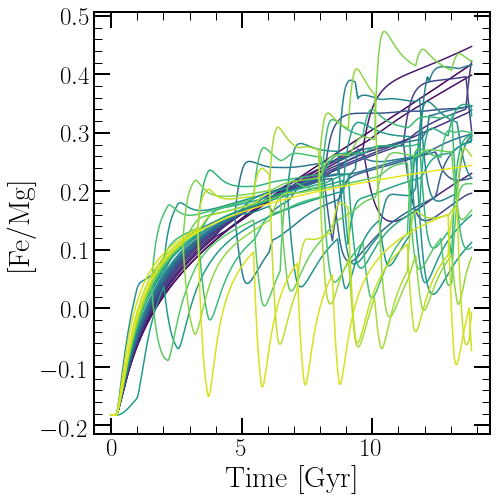

In [34]:
fig = plt.figure(figsize = (7, 7)) 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("Time [Gyr]") 
ax.set_ylabel("[Fe/Mg]") 
for i in range(len(out.keys())): 
    name = "zone%d" % (i) 
    ax.plot(out[name].history["time"], out[name].history["[Fe/Mg]"], c = cmap(float(i / len(out.keys())))) 
plt.tight_layout() 
plt.savefig("FeMg_vs_time_diskmodel.pdf")
plt.show()

In [4]:
def zonefilter(tracer_data, zone): 
    return list(filter(lambda x: int(x[1]) == zone, tracer_data)) 
def tformfilter(tracer_data, tformbin): 
    return list(filter(lambda x: tformbin[0] <= x[0] <= tformbin[1], tracer_data)) 

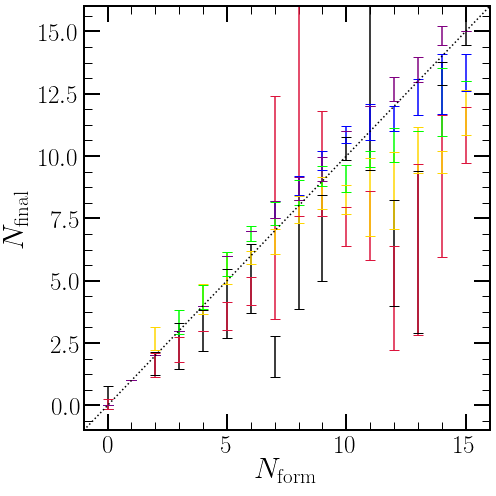

In [13]:
tracer_data = np.genfromtxt("../diskmodel.vice/tracers.out").tolist() 
tformbins = [[0, 2], [2, 4], [4, 6], [6, 8], [8, 10], [10, 12]] 
colors = ["black", "crimson", "gold", "lime", "blue", "purple"] 
fig = plt.figure(figsize = (7, 7)) 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel(r"$N_\text{form}$") 
ax.set_ylabel(r"$N_\text{final}$") 
for i in range(len(tformbins)): 
    tracers = tformfilter(tracer_data, tformbins[i]) 
    for j in range(30): # the number of bins 
        sub = zonefilter(tracers, j) 
        mean_final = np.mean([x[2] for x in sub]) 
        std_final = np.std([x[2] for x in sub]) 
        ax.errorbar([j], [mean_final], yerr = [std_final], c = v.colors()[colors[i]]) 
ax.set_xlim([-1, 16]) 
ax.set_ylim([-1, 16]) 
ax.plot([-1, 31], [-1, 31], c = v.colors()["black"], linestyle = ':') 
plt.tight_layout() 
plt.show() 